# Dimensionality Reduction

Dimensionality reduction is a technique used in data analysis and machine learning to reduce the number of features in a dataset while preserving as much information as possible.
 High-dimensional data can be challenging to analyze and visualize, and it can lead to issues like overfitting in machine learning models. By reducing the number of dimensions, we aim to simplify the dataset, making it easier to work with and interpret.

 There are several methods for dimensionality reduction, including:

1. Principal Component Analysis (PCA)

2. t-Distributed Stochastic Neighbor Embedding (t-SNE)

3. Uniform Manifold Approximation and Projection (UMAP)

4. Linear Discriminant Analysis (LDA)

5. Isomap

In this Notebook, we'll use PCA technique
We'll also use two techniques to determine the optimal number of clusters for the diabetes dataset.
# 1. Elbow Method
# 2. Silhouette Score Method

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [5]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Using the elbow method.

In [10]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

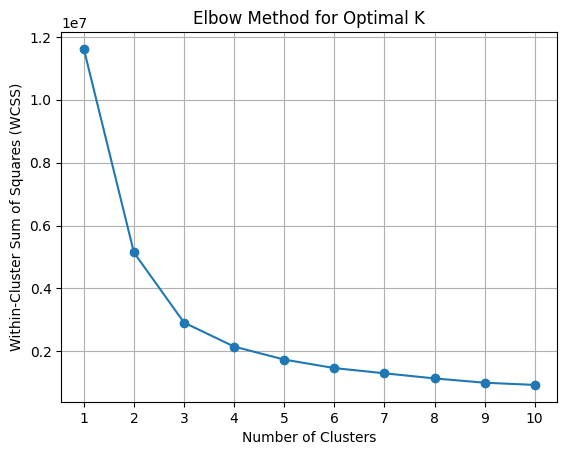

In [11]:

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [12]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
y_kmeans_pca = kmeans.predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


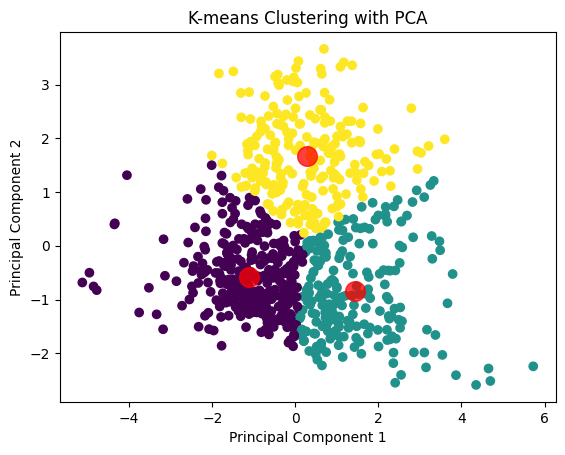

In [13]:
# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()

# Clusters

The dataset is divided into three clusters (indicated by purple, yellow, and blue color points).

Why Three Clusters?: The number of clusters (3) was chosen because it provided the best separation of data points as indicated by the elbow method, which suggests an optimal number of clusters.

Meaning of Clusters:
Each cluster represents a group of data points that are more similar to each other than to points in other clusters. The similarity is based on the chosen features of the data and the principal components.

# Silhouette Score Method

In [14]:
silhouette_scores = []

k = range(2, 11)

for k in k:
  kmeans = KMeans(n_clusters=k, random_state = 42)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_scores.append(score)
  print(f'Silhouette Score for {k} clusters: {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.5687897205830247
Silhouette Score for 3 clusters: 0.5104287492214447
Silhouette Score for 4 clusters: 0.42774937689821346
Silhouette Score for 5 clusters: 0.3969180143549049


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.32925689596204044


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.33359227428351756


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.35036064213472234


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 9 clusters: 0.33962994537552743


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 10 clusters: 0.2892769519864188


In [15]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'\n The optimal number of clusters is {optimal_k} with a Silhouette score of {max(silhouette_scores)}')


 The optimal number of clusters is 2 with a Silhouette score of 0.5687897205830247


In [16]:
# Apply KMeans clustering on PCA-transformed data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans_pca = kmeans.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


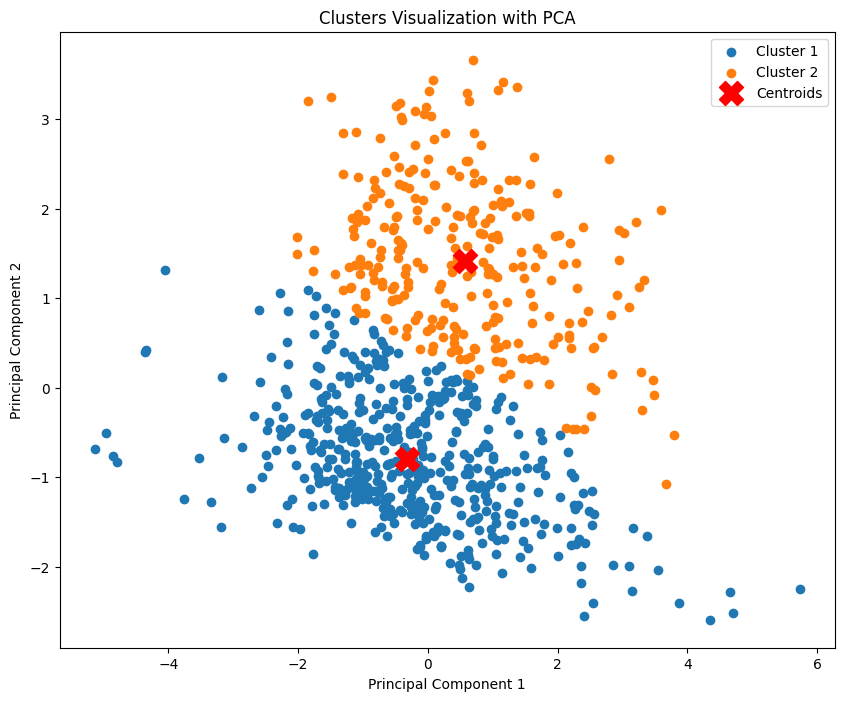

In [17]:
# Visualize the clusters
plt.figure(figsize=(10, 8))
for i in range(optimal_k):
    plt.scatter(X_pca[y_kmeans_pca == i, 0], X_pca[y_kmeans_pca == i, 1], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization with PCA')
plt.legend()
plt.show()

# Conclusion:


 The Silhouette Score Method performed better in this case as it accurately reflected the dataset’s inherent structure identifying the 2 distinct groups effectively(i.e., diabetic vs. non-diabetic).